[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

# 4.1.1 CO2 Emissionen 
## 4.1.1.1 Vergleich zu OIB RL 6


In [30]:
# OPTIONAL: Load the "autoreload" extension so that code can change
from importlib import reload
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [32]:
%matplotlib inline
import sys
sys.path.append("..\\")
sys.path
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap

In [33]:
OIB_RL6 = [
    ["Jänner"   , 1.98, 1.46, 0.52, 332],
    ["Februar"  , 1.97, 1.42, 0.55, 322],
    ["März"     , 1.89, 1.28, 0.61, 288],
    ["April"    , 1.73, 1.03, 0.7, 230],
    ["Mai"      , 1.61, 0.85, 0.76, 182],
    ["Juni"     , 1.60, 0.83, 0.77, 179],
    ["Juli"     , 1.58, 0.82, 0.76, 178],
    ["August"   , 1.62, 0.85, 0.77, 182],
    ["September", 1.73, 1.03, 0.70, 227],
    ["Oktober"  , 1.88, 1.26, 0.62, 284],
    ["November" , 1.94, 1.38, 0.56, 308],
    ["Dezember" , 1.96,1.42, 0.54, 318]
]

df_OIB_RL6 = pd.DataFrame(OIB_RL6, columns = ["month","fPE","fPE,n.ern", "fPE,ern" , "fCO2eq" ])
oib_co2 = df_OIB_RL6["fCO2eq"]

In [34]:
df_2015_2019 = elmap.read_interim("em_common_15-19.csv")
rs = df_2015_2019.resample("D").mean()

c:\Users\Simon Schneider\Code\FLUCCOplus\notebooks\..\FLUCCOplus\plots.py:55: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sns.lineplot(x=rs.index.week, y=var, data=rs, color="black", ax=ax, ci=99.9)
c:\Users\Simon Schneider\Code\FLUCCOplus\notebooks\..\FLUCCOplus\plots.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.9)` for the same effect.

  sns.lineplot(x=rs.index.week, y=var, data=rs, color="black", ax=ax, ci=99.9)
c:\Users\Simon Schneider\Code\FLUCCOplus\notebooks\..\FLUCCOplus\plots.py:55: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.i

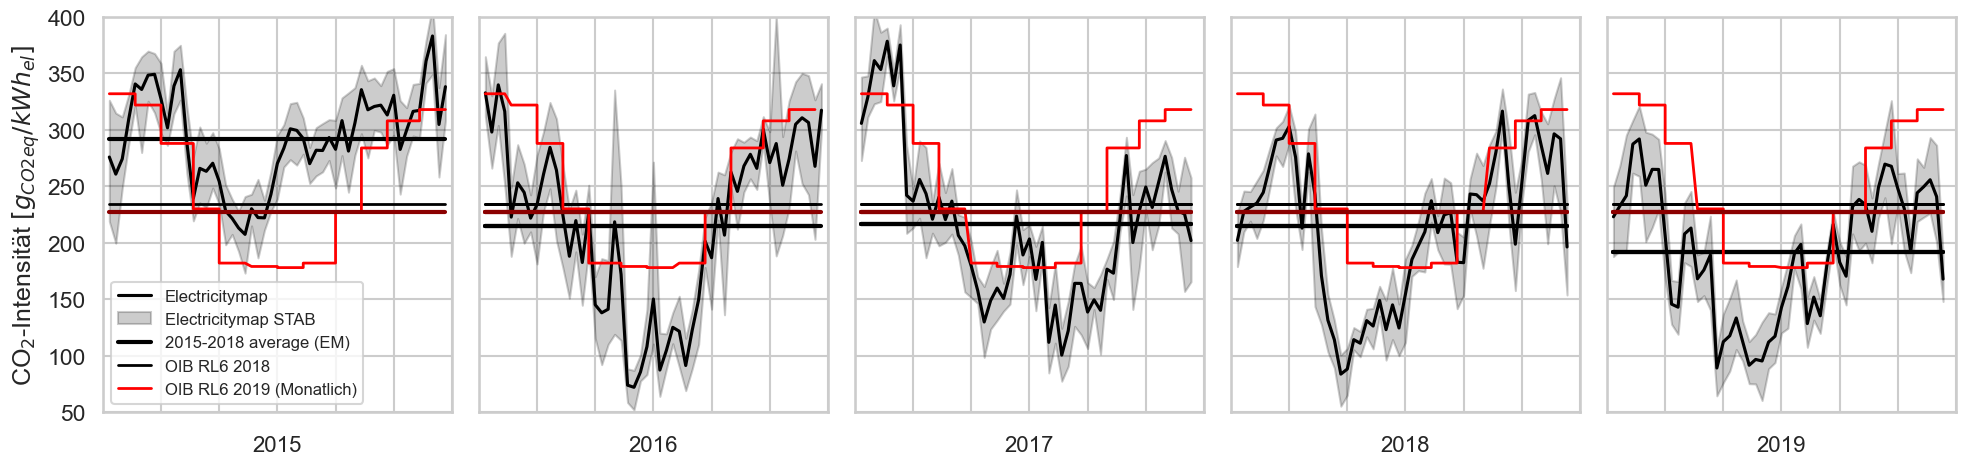

In [53]:
from FLUCCOplus.plots import plot_OIBCO2_comparison, emissionyear

fig = plot_OIBCO2_comparison(rs, oib_co2, [2015, 2016, 2017, 2018, 2019])
fig.savefig("../data/processed/figures/OIBCO2Vergleich", dpi=config.DPI, bbox_inches = 'tight');

Annual Carbon Emission Averages

<Axes: >

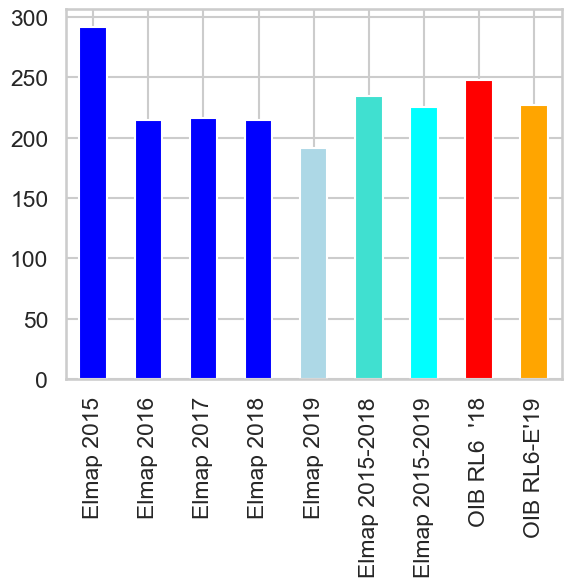

In [48]:
avg = elmap.annual_emissions()
avg.plot(kind="bar", color=["blue", "blue", "blue","blue","lightblue","turquoise","cyan","red", "orange"])

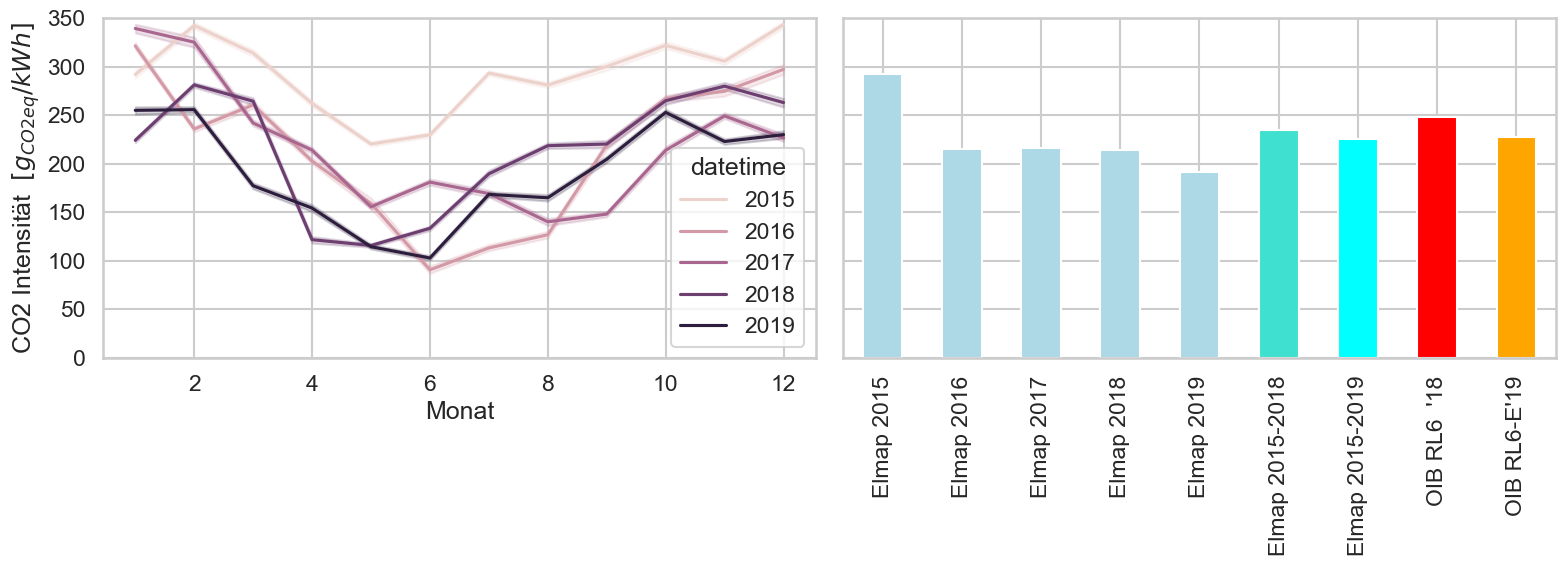

In [49]:
data = elmap.fetch_common()
numerical = ["carbon_intensity_avg"]
titles = "CO2 Intensität  $[g_{CO2eq}/kWh_{el}]$"

data = data[numerical]


sns.set(style="whitegrid", palette=sns.cubehelix_palette(8), context="talk")

fig, ax = plt.subplots(1,2, figsize=(16,6), sharey=True, layout="tight")
for col, var in enumerate(numerical):
    sns.lineplot(x=data.index.month, y=var, data=data, hue=data.index.year, ax=ax[0]);
    avg.plot(kind="bar", color=[*["lightblue"]*5,"turquoise","cyan","red","orange"], ax=ax[1])
    ax[col].set(xlabel="Monat",ylabel=titles)
    ax[0].set_ylim(0,350)
    ax[1].set_ylim(0,350)

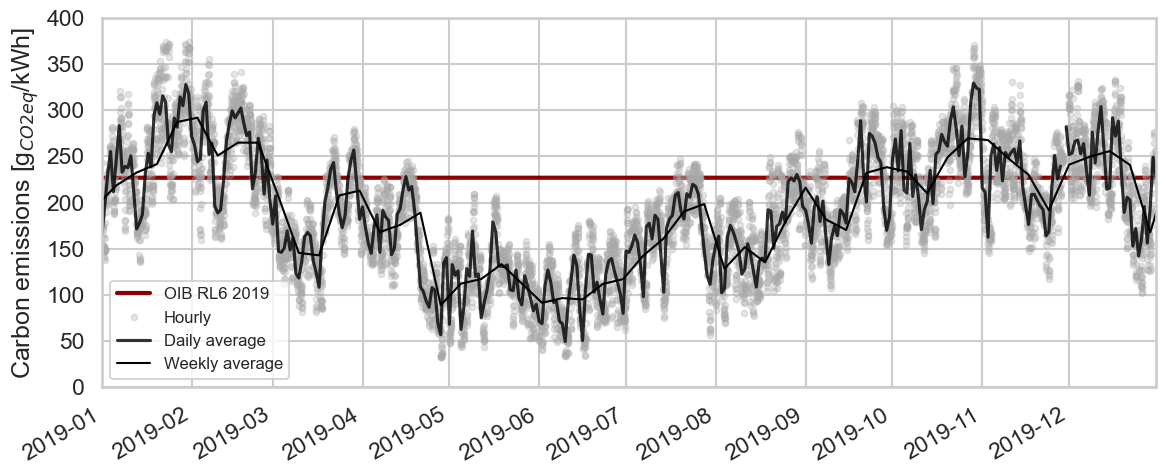

In [38]:

from FLUCCOplus.plots import plot_HDW

fig, ax = plt.subplots(1, 1, figsize=(12,5))
oib19 = pd.Series([227 for m in df_2015_2019.index.month], df_2015_2019.index)
oib19.plot(color="darkred", linewidth=3, ax=ax)
fig = plot_HDW(df=df_2015_2019, fig=fig, ax=ax,
               legend=["OIB RL6 2019","Hourly","Daily average", "Weekly average"])
ax.set_ylim(0,400)
fig.savefig("../data/processed/figures/Emissions_HDW_2019", dpi=config.DPI, bbox_inches = 'tight')

